<a href="https://colab.research.google.com/github/Manika7777/CSI_WEEK3_MS/blob/main/Data_Visualization(TITANIC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pandas seaborn matplotlib


# *Loading the Dataset*






In [11]:
import pandas as pd
titanic = pd.read_csv("Titanic-Dataset.csv")


# *Check for missing values*

In [12]:
# Check for missing values

print("\nMissing values in each column:\n", titanic.isnull().sum())

print("\nPercentage of missing values in each column:\n",
      (titanic.isnull().sum() / len(titanic)) * 100)



Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Percentage of missing values in each column:
 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


# *Missing Values Heatmap*

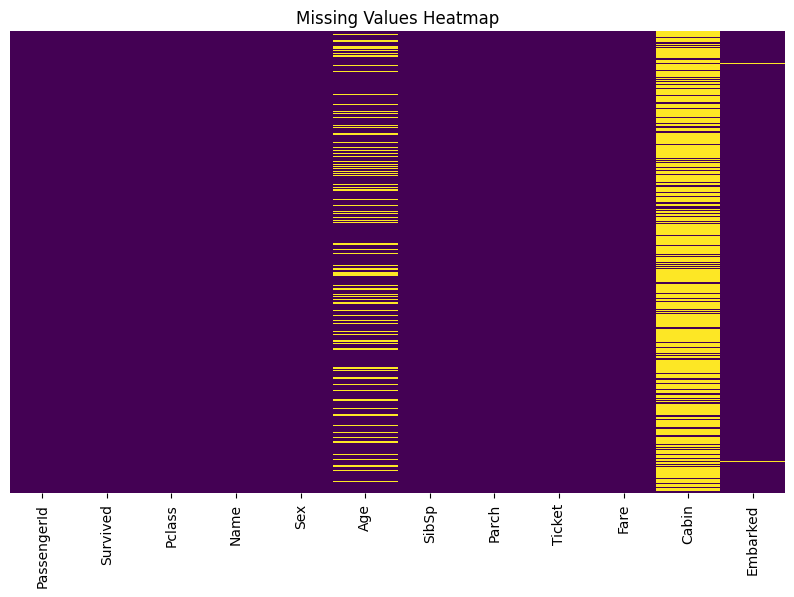

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()


# *Missing Values Heatmap based on Numerical and Categorical Columns*

Original Dataset Shape: (891, 15)

Missing values before imputation:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


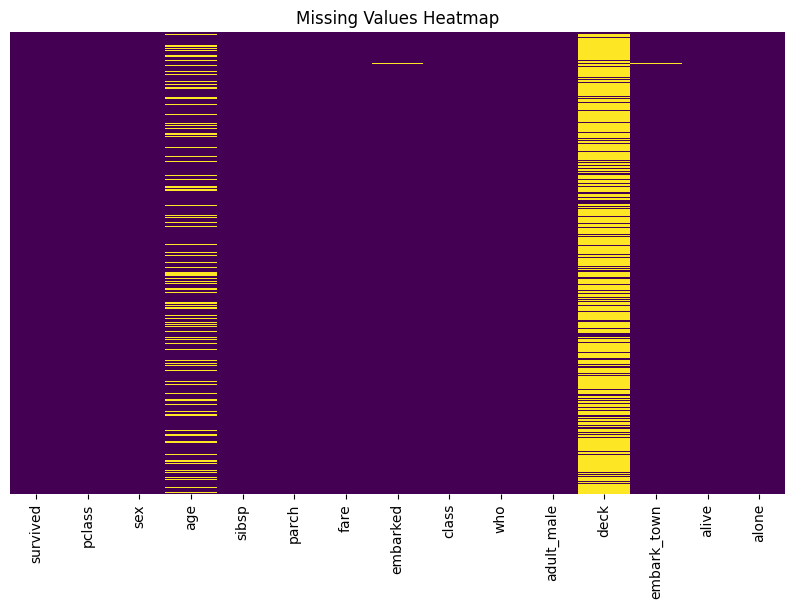


Numerical columns to be imputed with ML: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
Categorical columns to be filled with mode: ['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']

Missing values after imputation:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

✅ All missing values handled successfully!


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [14]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Preview the dataset
print("Original Dataset Shape:", titanic.shape)
print("\nMissing values before imputation:\n", titanic.isnull().sum())

# Optional: Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

# Create a copy to avoid modifying the original
titanic_data_filled = titanic.copy()

# Separate numerical and categorical columns
numerical_cols = titanic_data_filled.select_dtypes(include=['number']).columns
categorical_cols = titanic_data_filled.select_dtypes(exclude=['number']).columns

print("\nNumerical columns to be imputed with ML:", numerical_cols.tolist())
print("Categorical columns to be filled with mode:", categorical_cols.tolist())

# Use IterativeImputer with RandomForestRegressor for numerical features
imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
titanic_data_filled[numerical_cols] = imputer_num.fit_transform(titanic_data_filled[numerical_cols])

# Fill missing values in categorical columns with mode
for col in categorical_cols:
    if titanic_data_filled[col].isnull().sum() > 0:
        titanic_data_filled[col] = titanic_data_filled[col].fillna(titanic_data_filled[col].mode()[0])

# Verify if any missing values remain
print("\nMissing values after imputation:\n", titanic_data_filled.isnull().sum())
print("\n✅ All missing values handled successfully!")


# *Survivors Count*

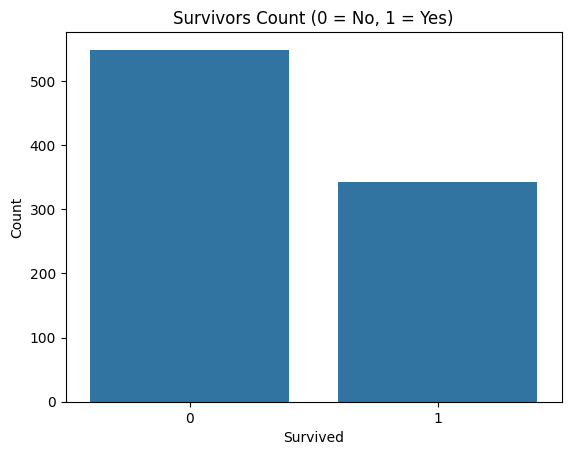

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')

# Count of Survivors
sns.countplot(data=titanic, x='survived')
plt.title('Survivors Count (0 = No, 1 = Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


# *Passenger Class Distribution*


Passenger Class Distribution:
 pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64


/tmp/ipython-input-16-1821337634.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pclass', data=titanic_data_filled, palette='Set1')


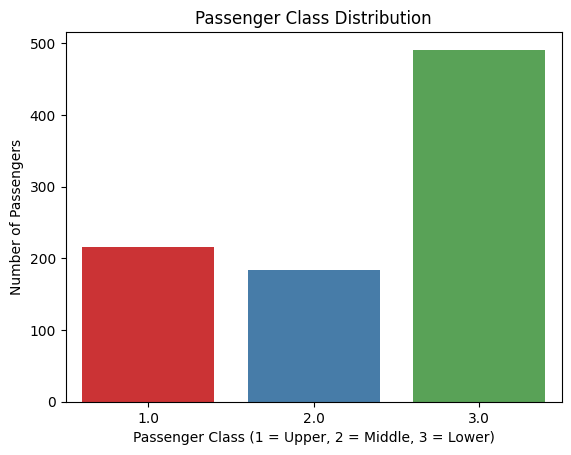

In [16]:
# Passenger Class Distribution

import seaborn as sns
import matplotlib.pyplot as plt

# Print value counts
print("\nPassenger Class Distribution:\n", titanic_data_filled['pclass'].value_counts())

# Plot
sns.countplot(x='pclass', data=titanic_data_filled, palette='Set1')
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class (1 = Upper, 2 = Middle, 3 = Lower)')
plt.ylabel('Number of Passengers')
plt.show()


# *Age Distribution of Passengers*


Age Statistics:
 count    891.000000
mean      29.685208
std       13.725383
min        0.420000
25%       21.000000
50%       28.042354
75%       37.000000
max       80.000000
Name: age, dtype: float64


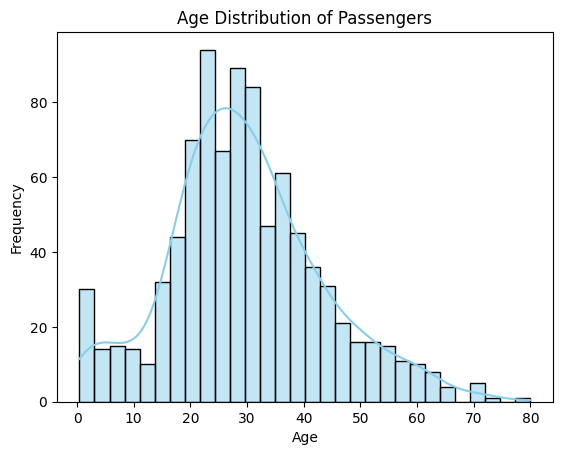

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print summary stats
print("\nAge Statistics:\n", titanic_data_filled['age'].describe())

# Plot
sns.histplot(x='age', data=titanic_data_filled, kde=True, bins=30, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# *Age Distribution by Survival*

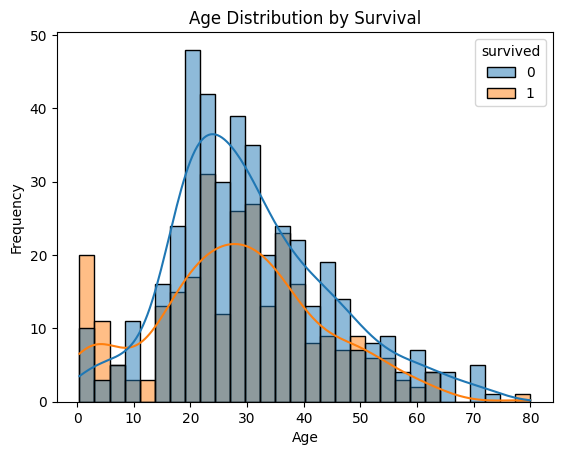

In [18]:
# Age Distribution by Survival
sns.histplot(data=titanic, x='age', hue='survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# *Gender Distribution of Passengers*


Sex Distribution:
 sex
male      577
female    314
Name: count, dtype: int64


/tmp/ipython-input-19-1496782924.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=titanic_data_filled, palette='pastel')


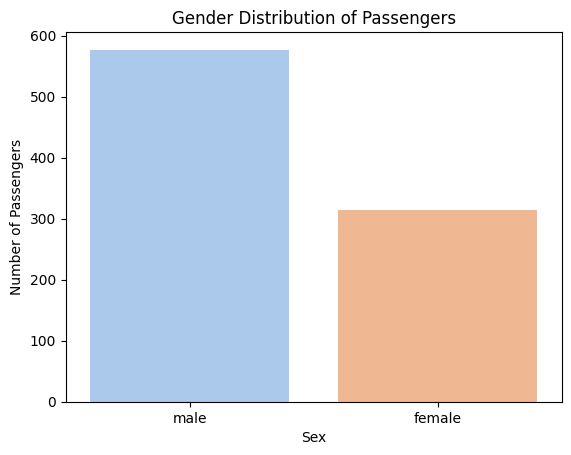

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print value counts
print("\nSex Distribution:\n", titanic_data_filled['sex'].value_counts())

# Plot
sns.countplot(x='sex', data=titanic_data_filled, palette='pastel')
plt.title('Gender Distribution of Passengers')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.show()


# *Survival by Gender*

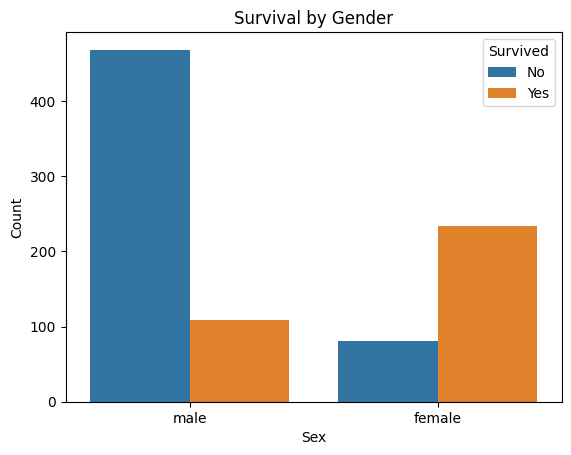

In [20]:
sns.countplot(data=titanic, x='sex', hue='survived')
plt.title('Survival by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


# *Survival by Passenger Class*

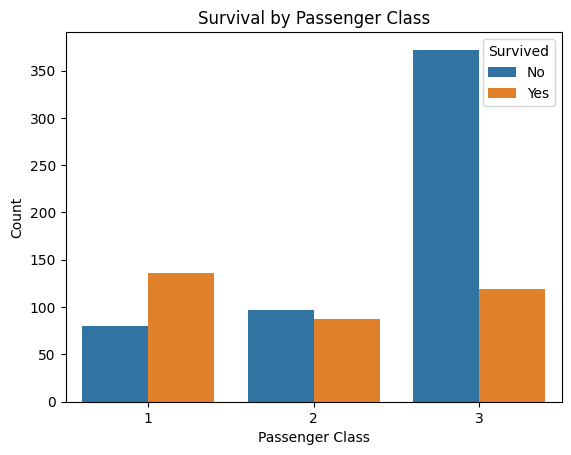

In [21]:
sns.countplot(data=titanic, x='pclass', hue='survived')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


# *Survival by Age Group*


Survival by Age Group:
 age_group            survived
Child (0-12)         1.0          41
                     0.0          40
Teen (13-18)         0.0          40
                     1.0          35
Young Adult (19-35)  0.0         299
                     1.0         173
Adult (36-60)        0.0         153
                     1.0          88
Senior (60+)         0.0          17
                     1.0           5
Name: count, dtype: int64


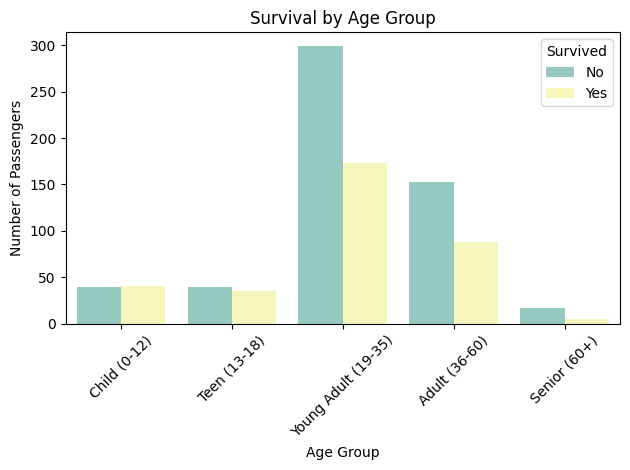

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define age groups using pd.cut
age_bins = [0, 12, 18, 35, 60, 100]
age_labels = ['Child (0-12)', 'Teen (13-18)', 'Young Adult (19-35)', 'Adult (36-60)', 'Senior (60+)']
titanic_data_filled['age_group'] = pd.cut(titanic_data_filled['age'], bins=age_bins, labels=age_labels)

# Print survival count per age group
print("\nSurvival by Age Group:\n", titanic_data_filled.groupby('age_group')['survived'].value_counts())

# Plot survival by age group
sns.countplot(x='age_group', hue='survived', data=titanic_data_filled, palette='Set3')
plt.title('Survival by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


# *Survival by Gender and Passenger Class*


Survival by Gender and Class:

survived       0.0  1.0
sex    pclass          
female 1.0       3   91
       2.0       6   70
       3.0      72   72
male   1.0      77   45
       2.0      91   17
       3.0     300   47


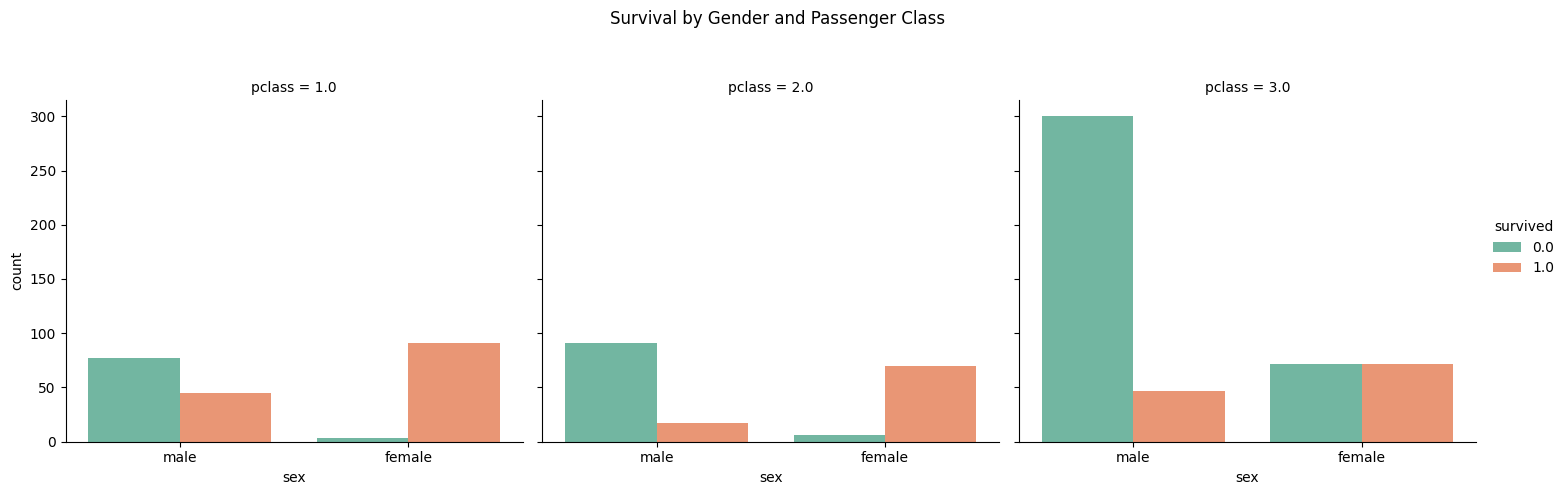

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print survival counts grouped by sex and class
print("\nSurvival by Gender and Class:\n")
print(titanic_data_filled.groupby(['sex', 'pclass'])['survived'].value_counts().unstack().fillna(0))

# Plot: Survival by Gender across Passenger Classes
sns.catplot(
    x='sex',
    hue='survived',
    col='pclass',
    kind='count',
    data=titanic_data_filled,
    palette='Set2'
)

plt.subplots_adjust(top=0.8)
plt.suptitle('Survival by Gender and Passenger Class')
plt.show()


# *Survival Based on Embarkment Point*


Embarkation Point Counts:
 embarked
S    646
C    168
Q     77
Name: count, dtype: int64


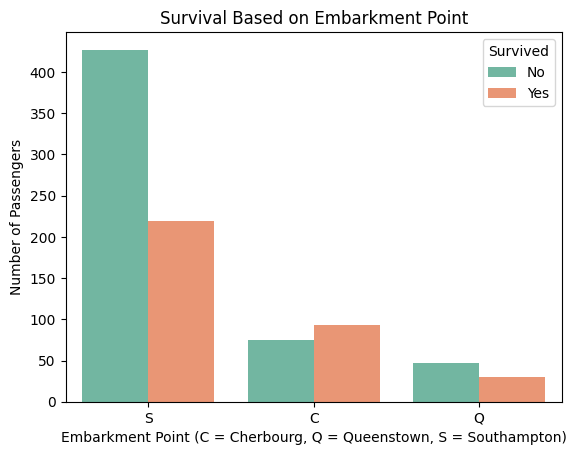

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print value counts
print("\nEmbarkation Point Counts:\n", titanic_data_filled['embarked'].value_counts())

# Plot survival count by embarkment point
sns.countplot(x='embarked', hue='survived', data=titanic_data_filled, palette='Set2')
plt.title('Survival Based on Embarkment Point')
plt.xlabel('Embarkment Point (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


# *Fare Distribution by Survival*

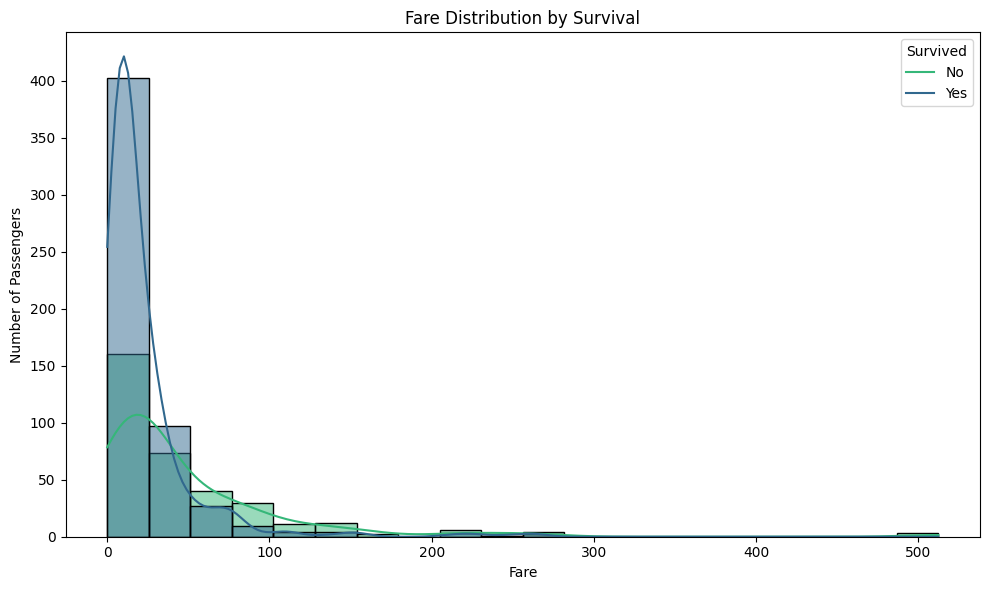

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival Based on Fare
plt.figure(figsize=(10, 6))

sns.histplot(data=titanic_data_filled, x='fare', hue='survived', bins=20, kde=True, palette='viridis')

plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


# *Survival Rate by Family Size*

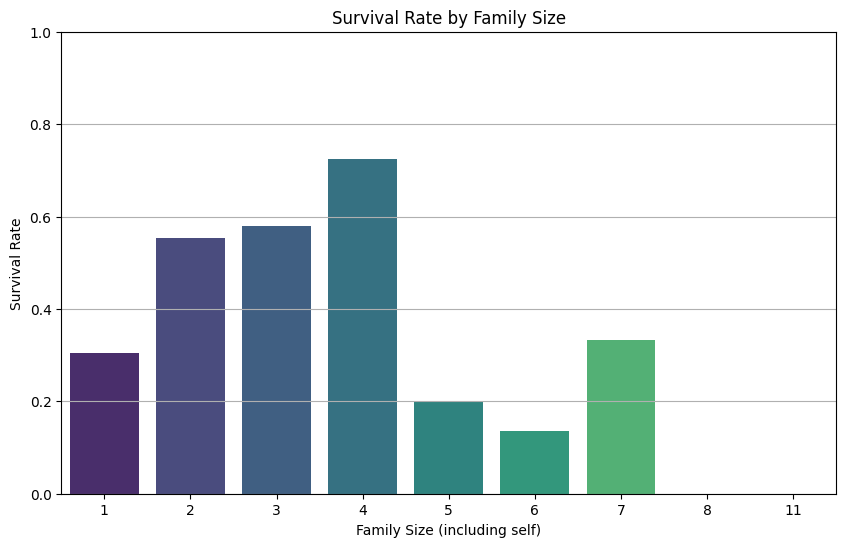

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
titanic = pd.read_csv("Titanic-Dataset.csv")

# Create a new column 'FamilySize'
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1  # +1 to include the passenger

# Group by FamilySize and calculate survival rate
family_survival = titanic.groupby('FamilySize')['Survived'].mean().reset_index()

# Plot survival rate vs family size
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=family_survival, palette='viridis')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size (including self)')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


# *Survival Based on Family Size*

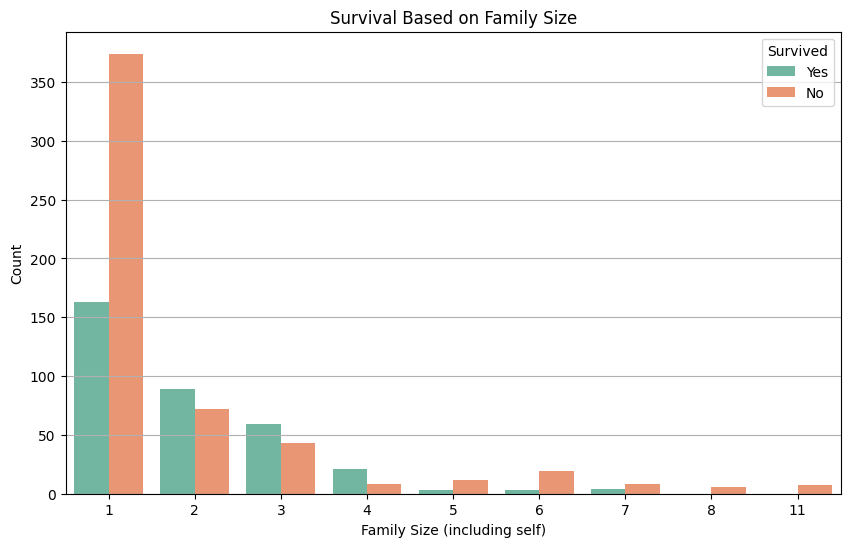

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
titanic = pd.read_csv("Titanic-Dataset.csv")

# Create FamilySize column
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

# Convert Survived to text for clearer labels
titanic['Survived'] = titanic['Survived'].map({0: 'No', 1: 'Yes'})

# Plot count of passengers per family size, split by survival
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=titanic, palette='Set2')

plt.title('Survival Based on Family Size')
plt.xlabel('Family Size (including self)')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.grid(axis='y')
plt.show()


# *Survival Based on Age Group*

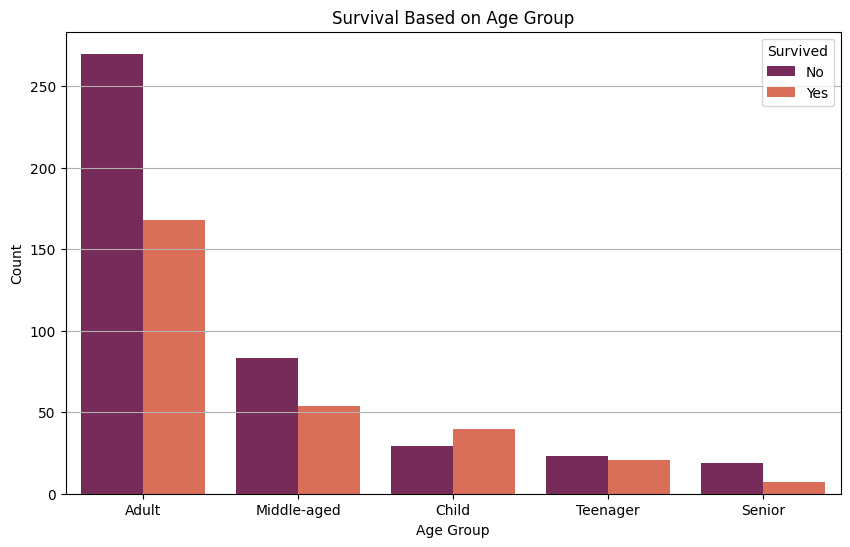

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
titanic = pd.read_csv("Titanic-Dataset.csv")

# Drop rows with missing Age
titanic = titanic.dropna(subset=['Age'])

# Define custom age group function
def get_age_group(age):
    if age < 13:
        return 'Child'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Adult'
    elif age < 60:
        return 'Middle-aged'
    else:
        return 'Senior'

# Apply function to create AgeGroup column
titanic['AgeGroup'] = titanic['Age'].apply(get_age_group)

# Convert Survived to readable form
titanic['Survived'] = titanic['Survived'].map({0: 'No', 1: 'Yes'})

# Plot survival count by age group
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic, x='AgeGroup', hue='Survived', palette='rocket')

plt.title('Survival Based on Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.grid(axis='y')
plt.legend(title='Survived')
plt.show()


# *Gender Distribution on Titanic*

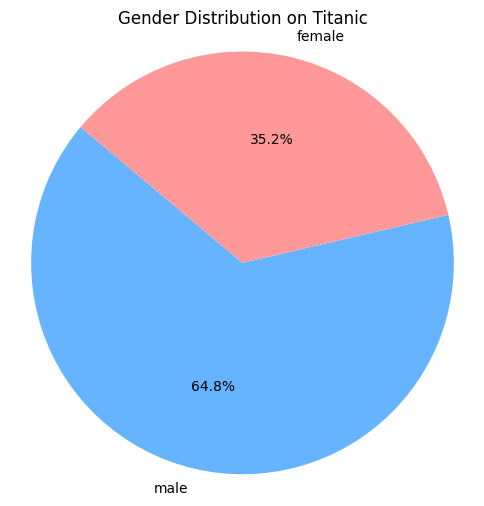

In [ ]:
gender_counts = titanic['sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Gender Distribution on Titanic')
plt.axis('equal')  # Makes it a circle
plt.show()


# *Feature Correlation Heatmap*

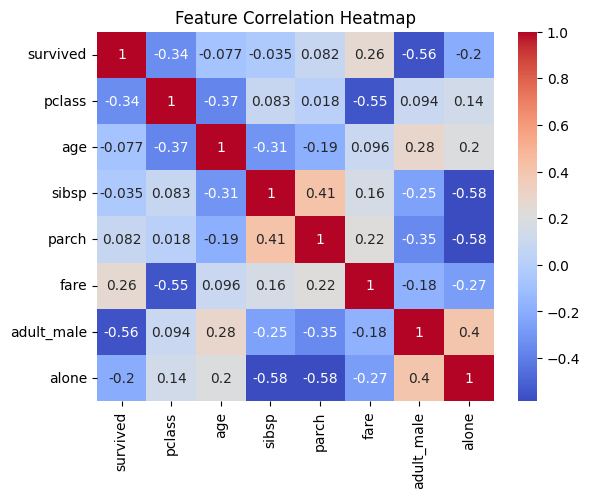

In [ ]:
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()
